In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

# Load original data
df = pd.read_csv('Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

print("Data loaded for visualization dashboard")

Data loaded for visualization dashboard


C:\Users\foste\AppData\Local\Temp\ipykernel_41224\1218886206.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


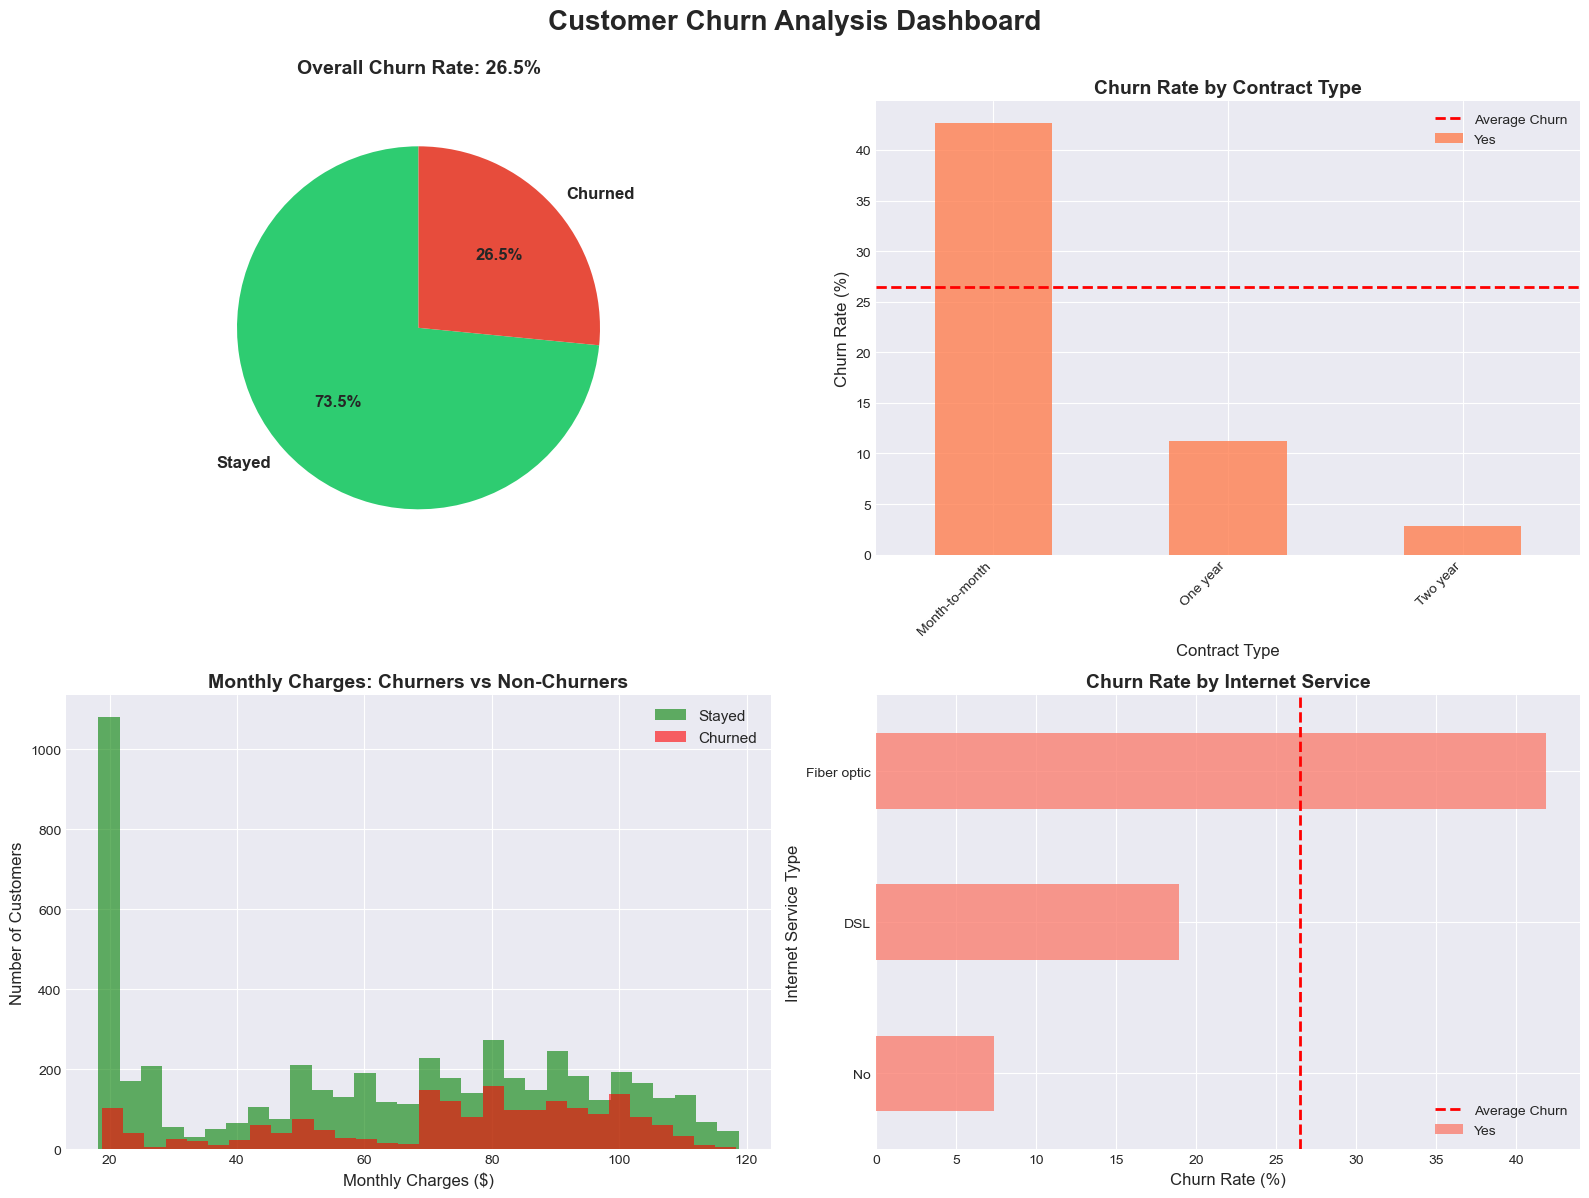

Dashboard saved as 'churn_analysis_dashboard.png'


In [2]:
# Create a 2x2 dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Churn Analysis Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Panel 1: Overall Churn Rate
churn_counts = df['Churn'].value_counts()
colors_churn = ['#2ecc71', '#e74c3c']
axes[0, 0].pie(churn_counts, labels=['Stayed', 'Churned'], autopct='%1.1f%%', startangle=90, colors=colors_churn, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0, 0].set_title('Overall Churn Rate: 26.5%', fontsize=14, fontweight='bold', pad=20)

# Panel 2: Churn by Contract Type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn['Yes'].plot(kind='bar', ax=axes[0, 1], color='coral', alpha=0.8)
axes[0, 1].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Contract Type', fontsize=12)
axes[0, 1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].axhline(y=26.5, color='red', linestyle='--', linewidth=2, label='Average Churn')
axes[0, 1].legend()

# Panel 3: Monthly Charges Distribution
df[df['Churn'] == 'No']['MonthlyCharges'].hist(bins=30, alpha=0.6, label='Stayed',  ax=axes[1, 0], color='green')
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(bins=30, alpha=0.6, label='Churned',   ax=axes[1, 0], color='red')
axes[1, 0].set_title('Monthly Charges: Churners vs Non-Churners', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].legend(fontsize=11)

# Panel 4: Churn by Internet Service
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn['Yes'].sort_values(ascending=True).plot(kind='barh', ax=axes[1, 1], color='salmon', alpha=0.8)
axes[1, 1].set_title('Churn Rate by Internet Service', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn Rate (%)', fontsize=12)
axes[1, 1].set_ylabel('Internet Service Type', fontsize=12)
axes[1, 1].axvline(x=26.5, color='red', linestyle='--', linewidth=2, label='Average Churn')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('churn_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dashboard saved as 'churn_analysis_dashboard.png'")